# ⚠️ **Important Disclaimer**

Do **not edit or delete** any of the **Markdown cells** (the ones containing the questions and instructions).

Only write your answers in the **code cells provided below each question**. Try to write each answer in **one code cell** after each question.

# EPA 2021 Vehicle Fuel Economy Dataset Analysis

In this part of the assignment you will explore a comprehensive dataset of 2021 vehicle fuel economy data from the U.S. Environmental Protection Agency (EPA), covering various makes, models, and vehicle configurations.

## Dataset Overview

The dataset includes vehicle specifications, performance metrics, and fuel efficiency data such as:

- `mfr_name`, `division`, `carline` – manufacturer and model information
- `city_mpg`, `hwy_mpg`, `comb_mpg` – fuel efficiency ratings (miles per gallon)
- `engine_displacement`, `no_cylinders` – engine specifications
- `transmission_speed`, `no_gears` – transmission details
- `drive_sys`, `drive_desc` – drivetrain configuration
- `fuel_usage`, `fuel_usage_desc` – fuel type requirements
- `class`, `car_truck` – vehicle classification
- `guzzler` – gas guzzler tax indicator (Y/N)
- `air_aspir_method_desc` – engine aspiration method (naturally aspirated, turbocharged, etc.)


## Q1. Inspect Dataset

Load the packages and the dataset **`epa2021.csv`** into a pandas DataFrame.  
Perform the following tasks:

1. Display the number of **unique values** in the columns `'mfr_name'`, `'class'`, and `'fuel_usage_desc'`.  
2. Print the **number of missing values** for each column in the dataset.

In [2]:
#importing libraries and dataset 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("epa2021.csv", sep = ",")

#code showing separator
with open ("epa2021.csv", "r") as a:
    print (a.readline())
    
#code showing basic information of dataset
print ("Shape(rows, columns):", df.shape)
print ("\nColumn names:\n", df.columns.tolist())
print ("\nFirst 5 rows:")
df.head()

#code displaying the number of unique values in the columns 'mfr_name', 'class', and 'fuel_usage_desc'
unique_counts = df[["mfr_name", "class", "fuel_usage_desc" ]].nunique()
print ("Unique counts")
print (unique_counts)
 
#code printing the number of missing values for each column in the dataset 
missing_counts = df.isnull().sum()
print("Inventory of missing values")
print(missing_counts)

rownames,model_yr,mfr_name,division,carline,mfr_code,model_type_index,engine_displacement,no_cylinders,transmission_speed,city_mpg,hwy_mpg,comb_mpg,guzzler,air_aspir_method,air_aspir_method_desc,transmission,transmission_desc,no_gears,trans_lockup,trans_creeper_gear,drive_sys,drive_desc,fuel_usage,fuel_usage_desc,class,car_truck,release_date,fuel_cell

Shape(rows, columns): (1108, 29)

Column names:
 ['rownames', 'model_yr', 'mfr_name', 'division', 'carline', 'mfr_code', 'model_type_index', 'engine_displacement', 'no_cylinders', 'transmission_speed', 'city_mpg', 'hwy_mpg', 'comb_mpg', 'guzzler', 'air_aspir_method', 'air_aspir_method_desc', 'transmission', 'transmission_desc', 'no_gears', 'trans_lockup', 'trans_creeper_gear', 'drive_sys', 'drive_desc', 'fuel_usage', 'fuel_usage_desc', 'class', 'car_truck', 'release_date', 'fuel_cell']

First 5 rows:
Unique counts
mfr_name           22
class              22
fuel_usage_desc     6
dtype: int64
Inventory of missing values
rownames          

## Q2. Handle Columns with High Missing Values

1. Calculate the **percentage of missing values** for each column in the dataset.  
2. Display only the columns that have missing values greater than 0%.  
3. Identify the columns where more than **40% of the data is missing**.  
4. Drop these high-missing-value columns from the DataFrame.
5. Print the shape of the DataFrame after these steps.

In [4]:
# Code calculating the percentage of missing values for each column in the dataset.
percentage_missing_values = (df.isnull().sum()/len(df))*100

# Code displaying only the columns that have missing values greater than 0%.
print("Columns with missing values greater than 0% are:")
print(percentage_missing_values[percentage_missing_values > 0])

# Code identifying the columns where more than 40% of the data is missing.
high_missing_columns = [col for col, perc in percentage_missing_values.items() if perc > 40]
print("Columns with missing values greater than 40% are:")
print(high_missing_columns)

# Code dropping these high-missing-value columns from the DataFrame.
df.drop(["car_truck"], axis = 1)
df.drop(["fuel_cell"], axis = 1)
df

#Dropping Permanently
df.drop(["car_truck"], axis = 1, inplace = True)
df.drop(["fuel_cell"], axis = 1, inplace = True)

# Code printing the shape of the DataFrame after these steps.
print("The rows and columns of my dataset respectively after dropping are:")
df.shape

Columns with missing values greater than 0% are:
air_aspir_method    39.620939
car_truck           45.758123
fuel_cell           77.256318
dtype: float64
Columns with missing values greater than 40% are:
['car_truck', 'fuel_cell']
The rows and columns of my dataset respectively after dropping are:


(1108, 27)

## Q3. Identify Fuel-Efficient Small Cars

Filter the dataset to select vehicles that meet all of the following criteria:  
- Combined MPG is at least **40**  
- Engine displacement is less than **2.0 liters**  
- Number of cylinders is less than or equal to **4**  

1. Print the total number of such vehicles.  
2. Show their manufacturer name, car line, engine displacement, combined MPG, and number of cylinders. All of them.

In [3]:
# Code filtering and printing the total number of such vehicles
filtering_criteria = df[(df["comb_mpg"] >= 40) & (df["engine_displacement"] < 2.0) & (df["no_cylinders"] <= 4)]
print("Total no of vehicles meeting criteria are:") 
print(filtering_criteria.shape[0])

# Showing their manufacturer name, car line, engine displacement, combined MPG, and number of cylinders. 
print("Specific details of cars meeting this criteria are:")
print(filtering_criteria[["mfr_name", "carline", "engine_displacement", "comb_mpg", "no_cylinders"]])

Total no of vehicles meeting criteria are:
13
Specific details of cars meeting this criteria are:
    mfr_name              carline  engine_displacement  comb_mpg  no_cylinders
236    Honda      INSIGHT TOURING                  1.5        48             4
301   Toyota       COROLLA HYBRID                  1.8        52             4
369    Honda              INSIGHT                  1.5        52             4
374  Hyundai       Elantra Hybrid                  1.6        50             4
375  Hyundai  Elantra Hybrid Blue                  1.6        54             4
453   Toyota                PRIUS                  1.8        52             4
454   Toyota            PRIUS AWD                  1.8        49             4
455   Toyota            PRIUS Eco                  1.8        56             4
494  Hyundai                Ioniq                  1.6        55             4
495  Hyundai           Ioniq Blue                  1.6        59             4
534      Kia                 Niro

## Q4. Average Engine Displacement by Drive System  

Group the dataset by the `drive_sys` column and calculate the **average engine displacement** for each drive system.  
Sort the results in descending order of average engine displacement and display the top 5 results.

In [4]:
# Code grouping the dataset by the drive_sys column and calculating the average engine displacement for each drive system.
# The result of grouping by and the mean is a series so it needs to also be converted back to a dataframe before sorting

avg_engine_displacement = df.groupby(["drive_sys"])["engine_displacement"].mean(numeric_only = True).reset_index()

# Code Sorting the results in descending order of average engine displacement
Sorted_results = avg_engine_displacement.sort_values("engine_displacement", ascending = False)

# Code displaying top 5 results of the sorted results
top_5_results = Sorted_results.head(5)
print("Top 5 results of average engine displacement are:")
print(top_5_results)

Top 5 results of average engine displacement are:
  drive_sys  engine_displacement
0         4             3.776111
4         R             3.751812
3         P             3.440000
1         A             3.023464
2         F             2.125758


## Q5. Create Derived Fuel Economy Metrics  

1. Create a new column `fuel_economy_score` as a weighted average of city and highway MPG, where city MPG contributes **30%** and highway MPG contributes **70%**.  
2. Create another column `mpg_zscore` that standardizes the combined MPG (`comb_mpg`) by subtracting the mean and dividing by the standard deviation.  
3. Display the first 10 rows of the DataFrame showing the following columns:  
   - `mfr_name`, `carline`, `city_mpg`, `hwy_mpg`, `comb_mpg`, `fuel_economy_score`, and `mpg_zscore`.

In [5]:
# Code Creating a new column fuel_economy_score as a weighted average of city and highway MPG, where city MPG contributes 30% and highway MPG contributes 70%.
df["fuel_economy_score"] = (df["city_mpg"] * 0.3) + (df["hwy_mpg"] * 0.7)

# Code Creating another column mpg_zscore that standardizes the combined MPG (comb_mpg) by subtracting the mean and dividing by the standard deviation.
mean_comb_mpg = df["comb_mpg"].mean()
std_comb_mpg = df["comb_mpg"].std()
df["mpg_zscore"] = (df["comb_mpg"]-mean_comb_mpg)/std_comb_mpg

# Code displaying the first 10 rows of the DataFrame showing the following columns:mfr_name, carline, city_mpg, hwy_mpg, comb_mpg, fuel_economy_score, and mpg_zscore.
required_col = df[["mfr_name", "carline", "city_mpg", "hwy_mpg", "comb_mpg", "fuel_economy_score", "mpg_zscore"]]
print(required_col.head(10))

              mfr_name              carline  city_mpg  hwy_mpg  comb_mpg  \
0                Honda                  NSX        21       22        21   
1         aston martin       Vantage Manual        14       21        17   
2         aston martin           Vantage V8        18       24        20   
3  Volkswagen Group of                   R8        13       20        16   
4  Volkswagen Group of               R8 2WD        14       23        17   
5  Volkswagen Group of            R8 Spyder        13       20        16   
6  Volkswagen Group of        R8 Spyder 2WD        14       23        17   
7  Volkswagen Group of  TT Roadster quattro        23       31        26   
8                  BMW              Z4 M40i        22       30        25   
9                  BMW         Z4 sDrive30i        25       32        28   

   fuel_economy_score  mpg_zscore  
0                21.7   -0.354518  
1                18.9   -0.975065  
2                22.2   -0.509655  
3                17

## Q6. Transmission Type Analysis  

Perform an analysis of vehicle transmissions with respect to fuel efficiency:  

1. Group the dataset by the `transmission` column.  
2. For each transmission type, calculate the following aggregations of `comb_mpg`:  
   - **mean**  
   - **standard deviation**  
   - **count** of vehicles  
3. Round all results to two decimal places.  
5. Do not forget to reset the index so that `transmission` appears as a regular column in the resulting DataFrame. Your final columns (excluding the index) should be exactly as follows:  
   - `transmission`,  `Avg_MPG`, `Std_MPG`, `Count`  
6. Sort the results by the average MPG (**Avg_MPG**) in descending order.  
7. Display the resulting table.
8. Save the final DataFrame to a CSV file named **`transmission_analysis.csv`**.

In [6]:
# Code grouping the dataset by the transmission column and calculation of aggregations of comb_mpg
transmission_group = df.groupby("transmission")["comb_mpg"].agg(
    Avg_MPG = "mean",
    Std_MPG = "std",
    Count = "count"
).reset_index()

# Code rounding all results to two decimal places.
transmission_group = transmission_group.round(2)

# Code sorting the results by the average MPG (Avg_MPG) in descending order.
transmission_group = transmission_group.sort_values("Avg_MPG", ascending = False)

# Code resetting the index
final_columns = ["transmission", "Avg_MPG", "Std_MPG", "Count"]

# Code displaying the resulting table
print (transmission_group)

# Saving the final DataFrame to a CSV file named transmission_analysis.csv.
transmission_group.to_csv("transmission_analysis.csv", index = False)

  transmission  Avg_MPG  Std_MPG  Count
3          CVT    35.58     7.61     45
6          SCV    31.59     5.86     73
2          AMS    24.12     9.66    115
4            M    24.08     5.43     85
5           SA    22.42     4.15    461
1           AM    21.69     5.65     32
0            A    20.35     3.66    297


## Q7. Distribution of Fuel Economy Score  

Create a histogram to visualize the distribution of the fuel economy score that you computed above.  
Use 30 bins and overlay a kernel density estimate (KDE) curve.  
Label the axes appropriately and add a descriptive title to the plot. 

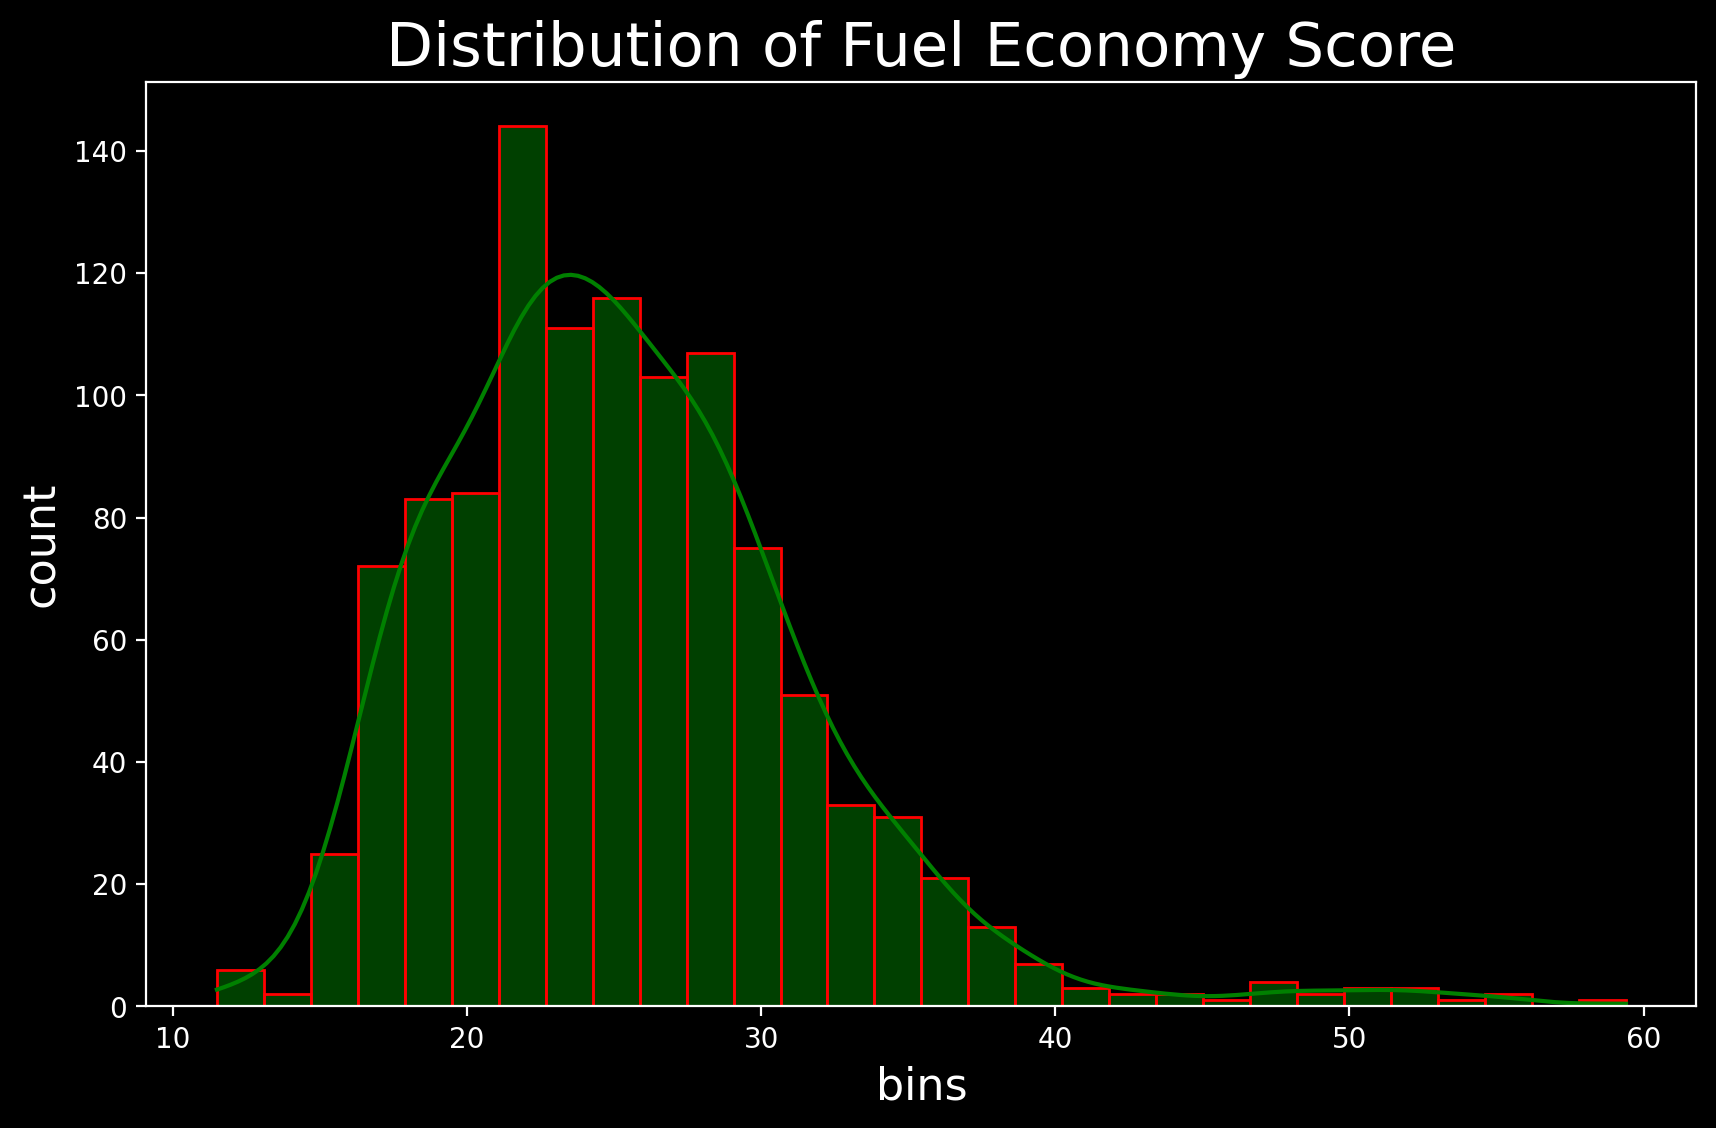

In [7]:
# Creating the required histogram
from matplotlib import style
style.use('dark_background')
plt.figure(figsize=(10,6), dpi = 200)
plt.title("Distribution of Fuel Economy Score", fontsize = 22)
plt.xlabel("bins", fontsize = 16)
plt.ylabel("count", fontsize = 16)
sns. histplot(data = df, x = "fuel_economy_score", bins = 30, kde = True, color = "g", linewidth = 1, edgecolor = "r")
plt.show()

## Q8. Average MPG by Engine Displacement Range  

In this task, you will group vehicles into **engine displacement ranges**.  

1. Create a new column `displacement_bin` that categorizes vehicles into the following ranges based on their engine displacement (the category names should be simple Strings):  
   - `0-2L`  
   - `2-4L`  
   - `4-6L`  
   - `6L+`  
2. Group the dataset by this new `displacement_bin` column and calculate the **average combined MPG** for each range.  
3. Create a bar chart showing the average combined MPG per displacement range.  
   - Label the axes appropriately.  
   - Add a descriptive title.

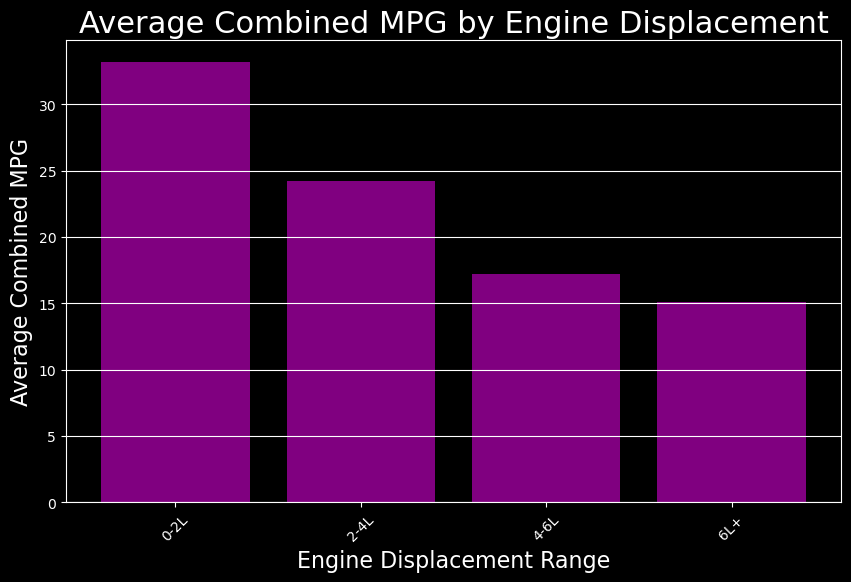

In [8]:
# Code creating a function and a new column called displacement_bin
def displacement_category(displacement):
    if displacement < 2.0:
        return "0-2L"
    elif 2.0 <= displacement < 4.0:
        return "2-4L"
    elif 4.0 <= displacement < 6.0:
        return "4-6L"
    else:
        return "6L+"
df["displacement_bin"] = df["engine_displacement"].apply(displacement_category)

# Grouping the dataset by this new displacement_bin column and calculating the average combined MPG for each range.
Avg_comb_mpg = df.groupby("displacement_bin")["comb_mpg"].mean().reset_index()

# Creating the barchart
plt.figure(figsize = (10,6))
plt. bar(Avg_comb_mpg["displacement_bin"], Avg_comb_mpg["comb_mpg"], color = "purple")
plt.title("Average Combined MPG by Engine Displacement", fontsize = 22)
plt.xlabel("Engine Displacement Range", fontsize = 16)
plt.ylabel("Average Combined MPG", fontsize = 16)
plt.xticks(rotation = 45)
plt.grid(axis="y")
plt.show()

## Q9. Vehicle Performance Analysis  

Create a scatter plot showing the relationship between **engine displacement** and **combined MPG**.  

- The x-axis represents **engine displacement (Liters)**.  
- The y-axis represents **combined MPG**.
- Color the points by **drive system** (`drive_sys`).  
- Scale point sizes by **number of cylinders** (`no_cylinders`).  
- Add dashed reference lines for the average engine displacement and average combined MPG. Include labels for both lines in the legend.  
- Label the axes and add a descriptive title.  

Also add:
- A legend showing the categories for drive system and cylinders.  
- Gridlines for better readability.

In [9]:
# Code Creating a scatter plot showing the relationship between engine displacement and combined MPG
plt.figure(figsize=(10,6))
style.use('dark_background')

# Code Coloring the points by drive system (drive_sys) and scaling point sizes by number of cylinders (no_cylinders).
sns.scatterplot(data = df, x = "engine_displacement", y = "comb_mpg", hue = "drive_sys", size = "no_cylinders", sizes = (20,300), alpha = 0.7, palette ="Set1")

# Code Creating average engine displacement and average combined MPG
avg_displacement = df["engine_displacement"].mean()
avg_comb_mpg = df["comb_mpg"].mean()

# Code Adding dashed reference lines for the average engine displacement and average combined MPG and including labels for both lines in the legend.
plt.axvline(avg_displacement, color="r", linestyle = "--", label = "Average Displacement")
plt.axhline(avg_comb_mpg, color="b", linestyle = "--", label = "Average Combined MPG")

# Code Adding labels and titles
plt.title("Engine Displacement vs. Combined MPG", fontsize = 22)
plt.xlabel("Engine Displacement", fontsize = 16)
plt.ylabel("Combined MPG", fontsize = 16)

# Code Adding legends, gridlines and showing plot
plt.grid(True)
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

## Q10. Recreate the Heatmap with Pivot Table 

Your task is to reproduce the following figure as closely as possible.  

**Important:** You **must** use a **pivot table** to solve this problem.

Here are a few helpful hints:  
- The plot was created using **Seaborn's `heatmap()`** function.  
- The color map used is **YlGnBu**.  

Start with a basic heatmap, then refine it by adding/adjusting:  
- annotations  
- ticks  
- labels  
- borders  
- title and axis labels  

**Save your final plot as a PDF file named:**  
`city_mpg_heatmap.pdf`

### Reference Figure

![Reference Heatmap](reference_heatmap.png)

In [28]:
# Selecting relevant columns and code of pivot table grouping by class and fuel type to calculate Avg MPG
subset = df[["fuel_usage_desc", "class", "city_mpg"]]
pivot_table= subset.groupby(["class", "fuel_usage_desc"])["city_mpg"].mean().unstack()

# Code Creating the heatmap
plt.figure(figsize=(12,10))
heat_map = sns.heatmap(pivot_table, annot = True, fmt = ".1f", linewidths = 0.5, cmap = "YlGnBu", linecolor = "black")
plt.title("Avg City MPG by Vehicle Class and Fuel Type", fontsize = 14, fontweight = "bold", color = "red")
plt.xlabel("Fuel Type", fontsize = 12)
plt.ylabel("Vehicle Class", fontsize = 12)
plt.style.use("default")
plt.xticks(rotation = 45, ha = "right")

# Code for calculating lowest MPG cell
min_val = pivot_table.min().min()
min_idx = pivot_table.stack().idxmin()

# Code findg the lowest MPG
x= pivot_table.columns.get_loc(min_idx[1]) 
y= pivot_table.index.get_loc(min_idx[0]) 

# Code adding arrow and label
heat_map.annotate ("Lowest MPG",xy = (x + 0.8, y + 0.5), xytext = (x + 1.2, y - 0.3),
                   arrowprops = dict(facecolor = "blue", arrowstyle = "->"), color = "blue", fontweight = "bold")
              
# Code saving and showing figure       
plt.savefig("city_mpg_heatmap.pdf", format = "pdf")
plt.tight_layout()
plt.show()